# *Traffic Signs Recognition Using CNN*

The dataset downloaded from this lnik :

https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?datasetId=82373&sortBy=voteCount

## Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Preprocessing the images

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


## Data Splitting and conversion

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Creating and Compiling the Model

In [4]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

# Training the Model

In [5]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 94s 94ms/step - loss: 1.6986 - accuracy: 0.5664 - val_loss: 0.4623 - val_accuracy: 0.8794
Epoch 2/20
981/981 [==============================] - 92s 94ms/step - loss: 0.4947 - accuracy: 0.8583 - val_loss: 0.1621 - val_accuracy: 0.9589
Epoch 3/20
981/981 [==============================] - 91s 93ms/step - loss: 0.3273 - accuracy: 0.9060 - val_loss: 0.1035 - val_accuracy: 0.9735
Epoch 4/20
981/981 [==============================] - 91s 93ms/step - loss: 0.2792 - accuracy: 0.9205 - val_loss: 0.1054 - val_accuracy: 0.9689
Epoch 5/20
981/981 [==============================] - 91s 93ms/step - loss: 0.2740 - accuracy: 0.9236 - val_loss: 0.1210 - val_accuracy: 0.9694
Epoch 6/20
981/981 [==============================] - 92s 93ms/step - loss: 0.2331 - accuracy: 0.9359 - val_loss: 0.0667 - val_accuracy: 0.9833
Epoch 7/20
981/981 [==============================] - 91s 93ms/step - loss: 0.2245 - accuracy: 0.9394 - val_loss: 0.0561 - val_accuracy:

## Visualizing the performance of the Model during Training

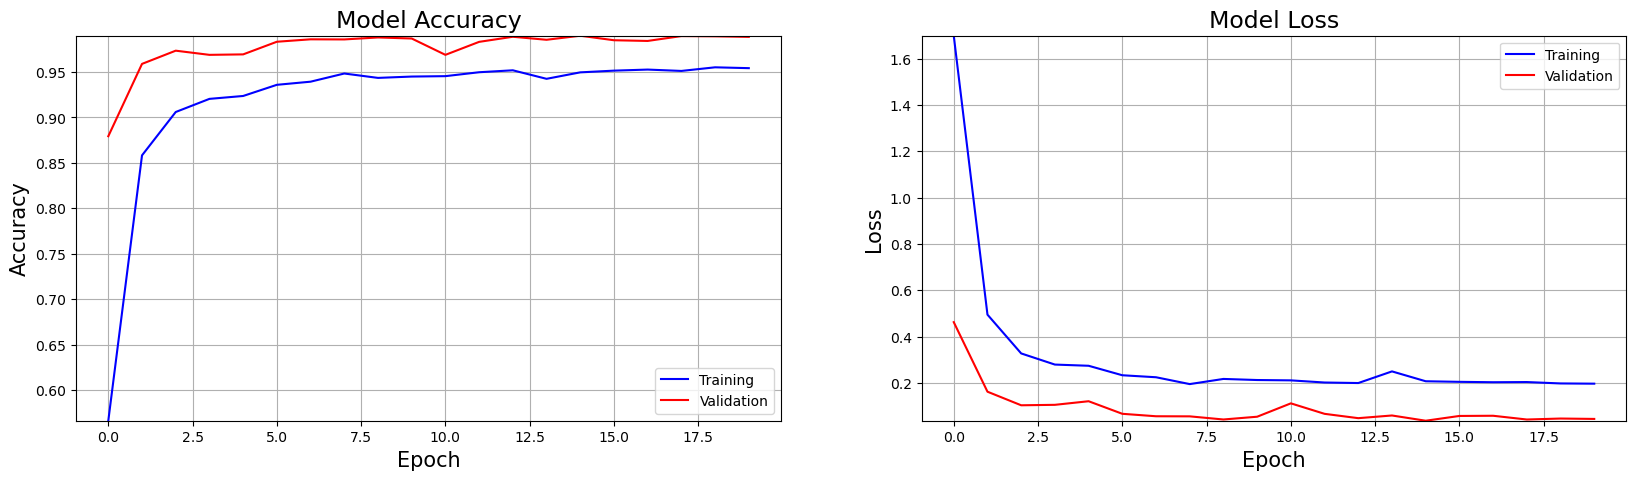

In [6]:
ylim_pad=[0, 0]
xlabel = 'Epoch'
legends = ['Training', 'Validation']
plt.figure(figsize=(20, 5))
y1 = history.history['accuracy']
y2 = history.history['val_accuracy']
min_y = min(min(y1), min(y2))-ylim_pad[0]
max_y = max(max(y1), max(y2))+ylim_pad[0]
plt.subplot(121)
plt.plot(y1,color='b')
plt.plot(y2,color='r')
plt.title('Model Accuracy', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='lower right')
plt.grid()
y1 = history.history['loss']
y2 = history.history['val_loss']
min_y = min(min(y1), min(y2))-ylim_pad[1]
max_y = max(max(y1), max(y2))+ylim_pad[1]
plt.subplot(122)
plt.plot(y1,color='b')
plt.plot(y2,color='r')
plt.title('Model Loss', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper right')
plt.grid()
plt.show()

## Testing and Evaluating the Model

In [7]:
y_test = pd.read_csv('Test.csv')
label = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
pred = np.argmax(model.predict(X_test), axis=-1)
from sklearn.metrics import accuracy_score
print('Accuracy :',accuracy_score(label, pred))


395/395 [==============================] - 8s 20ms/step
Accuracy : 0.9650039588281869


## Predictions on Test Data

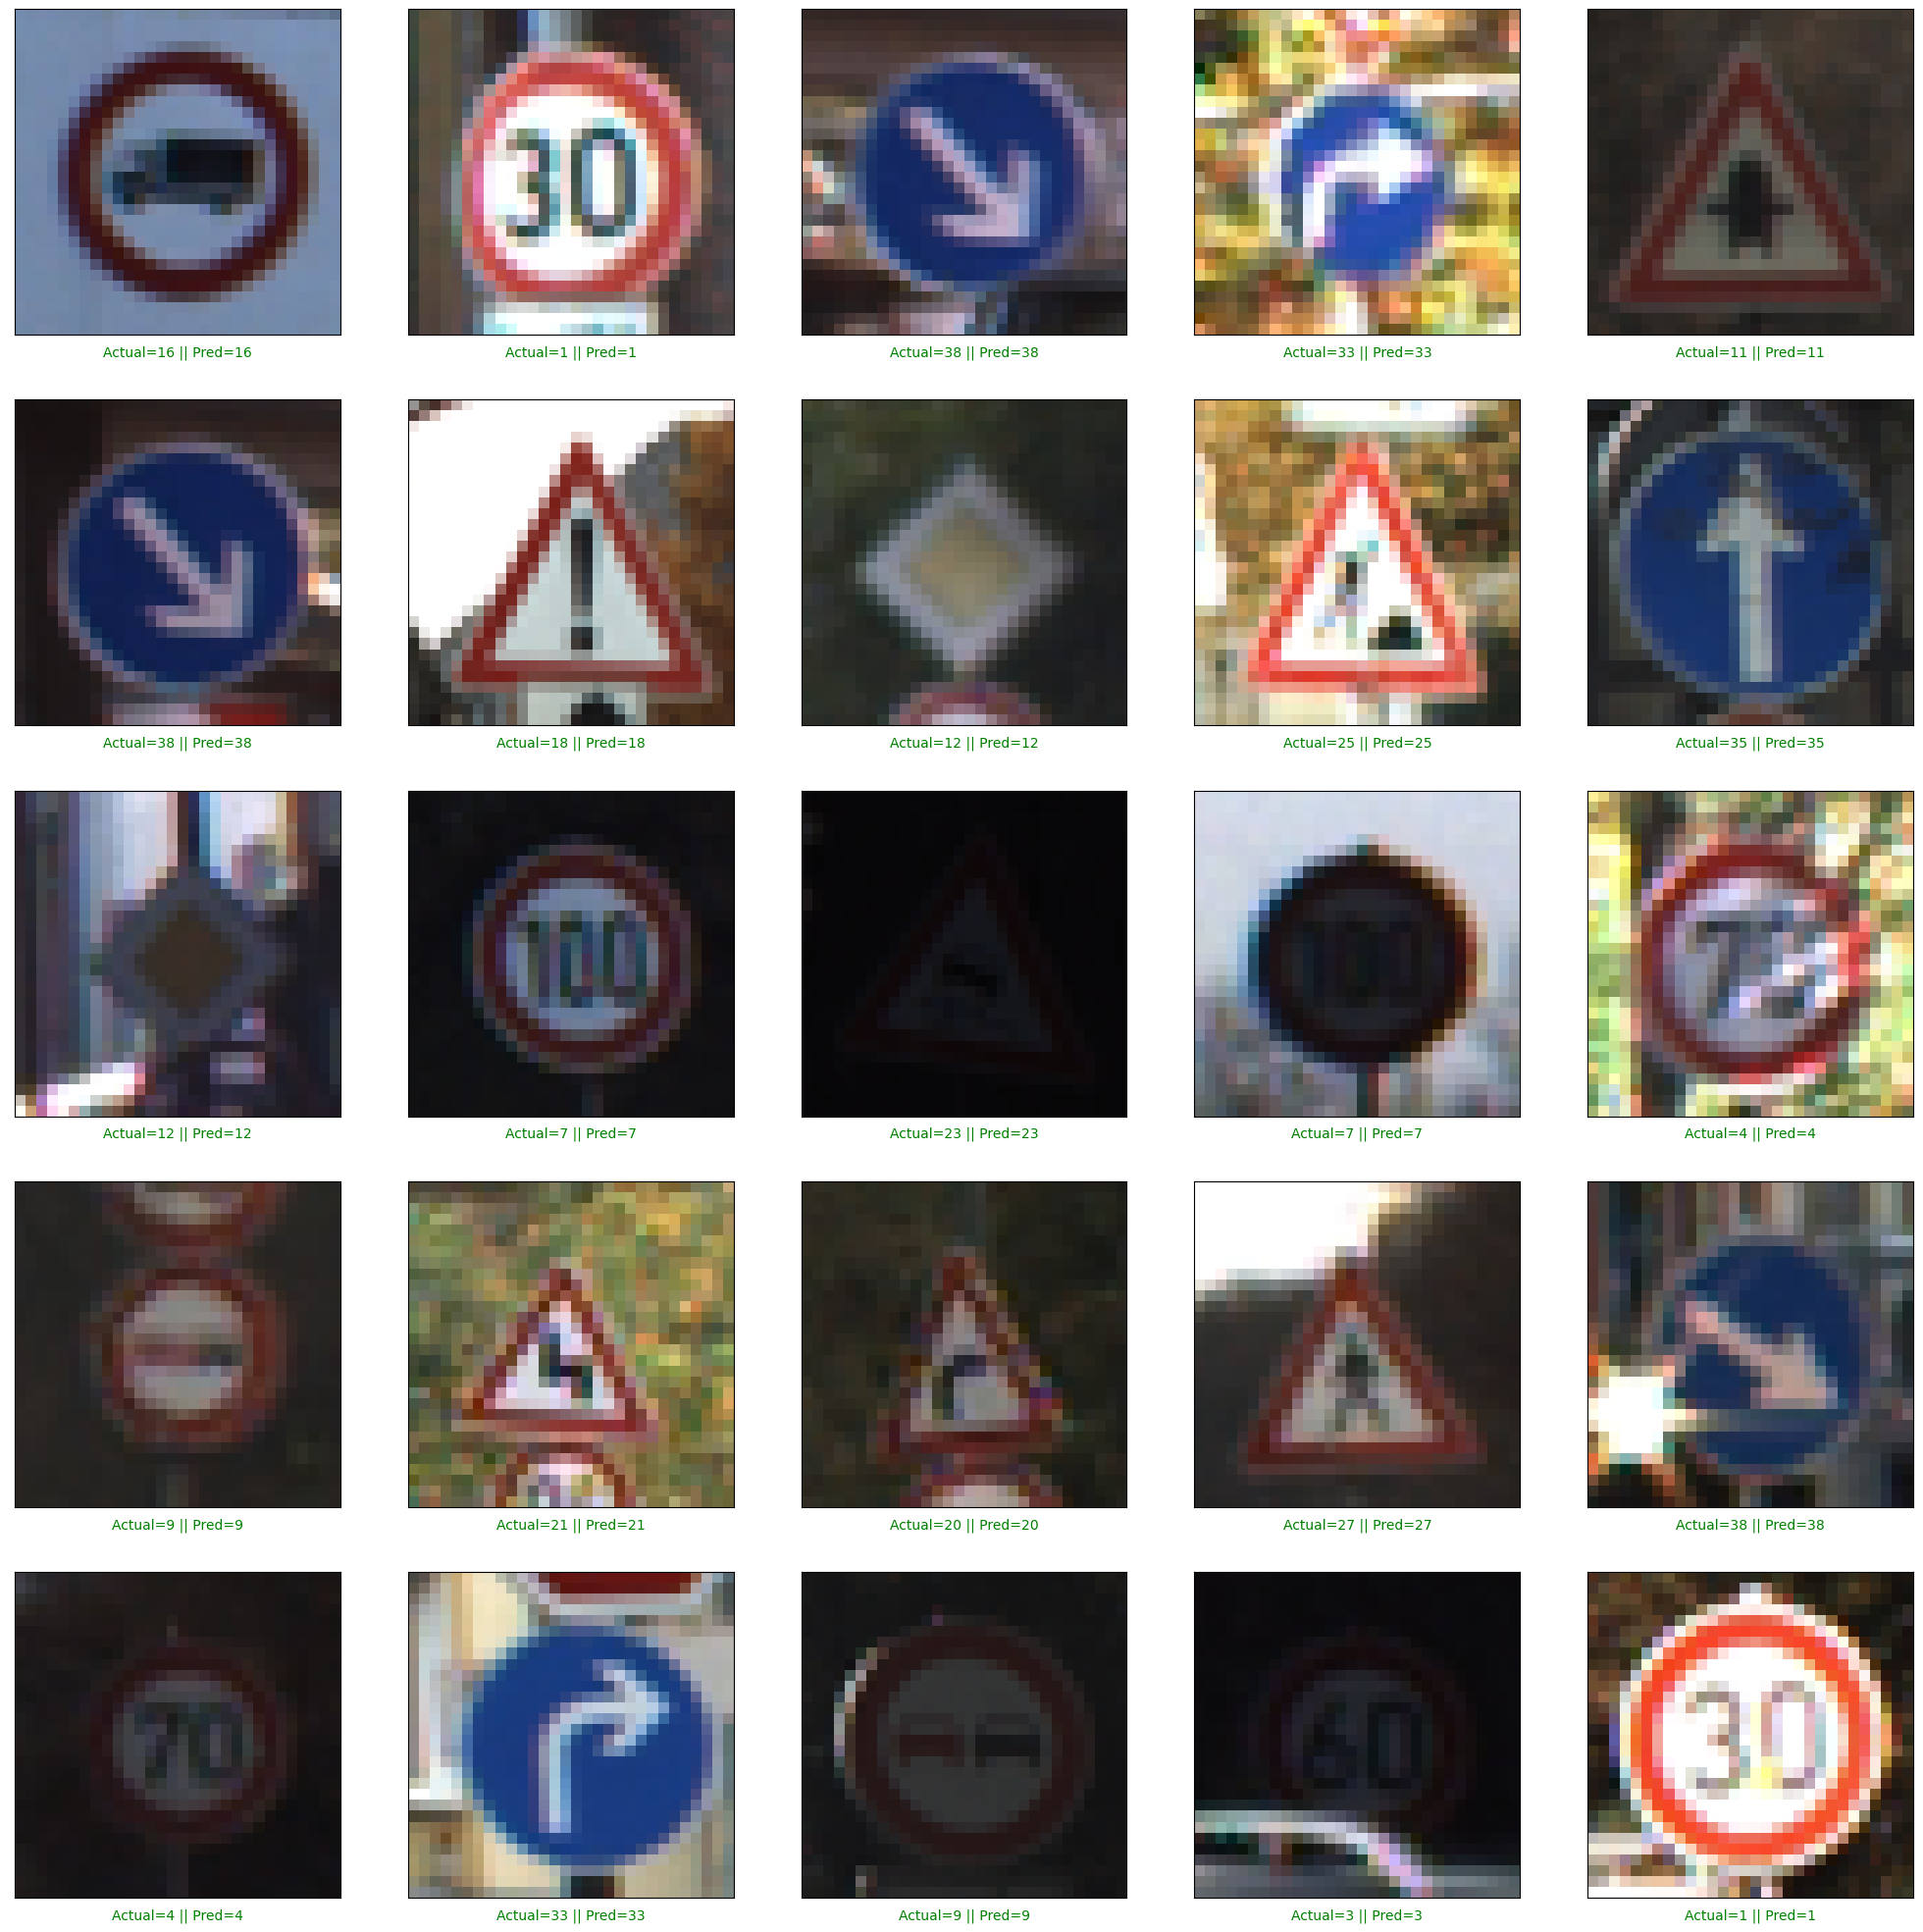

In [8]:
plt.figure(figsize = (25, 25))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = label[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

## Visualizing the Confusion Matrix

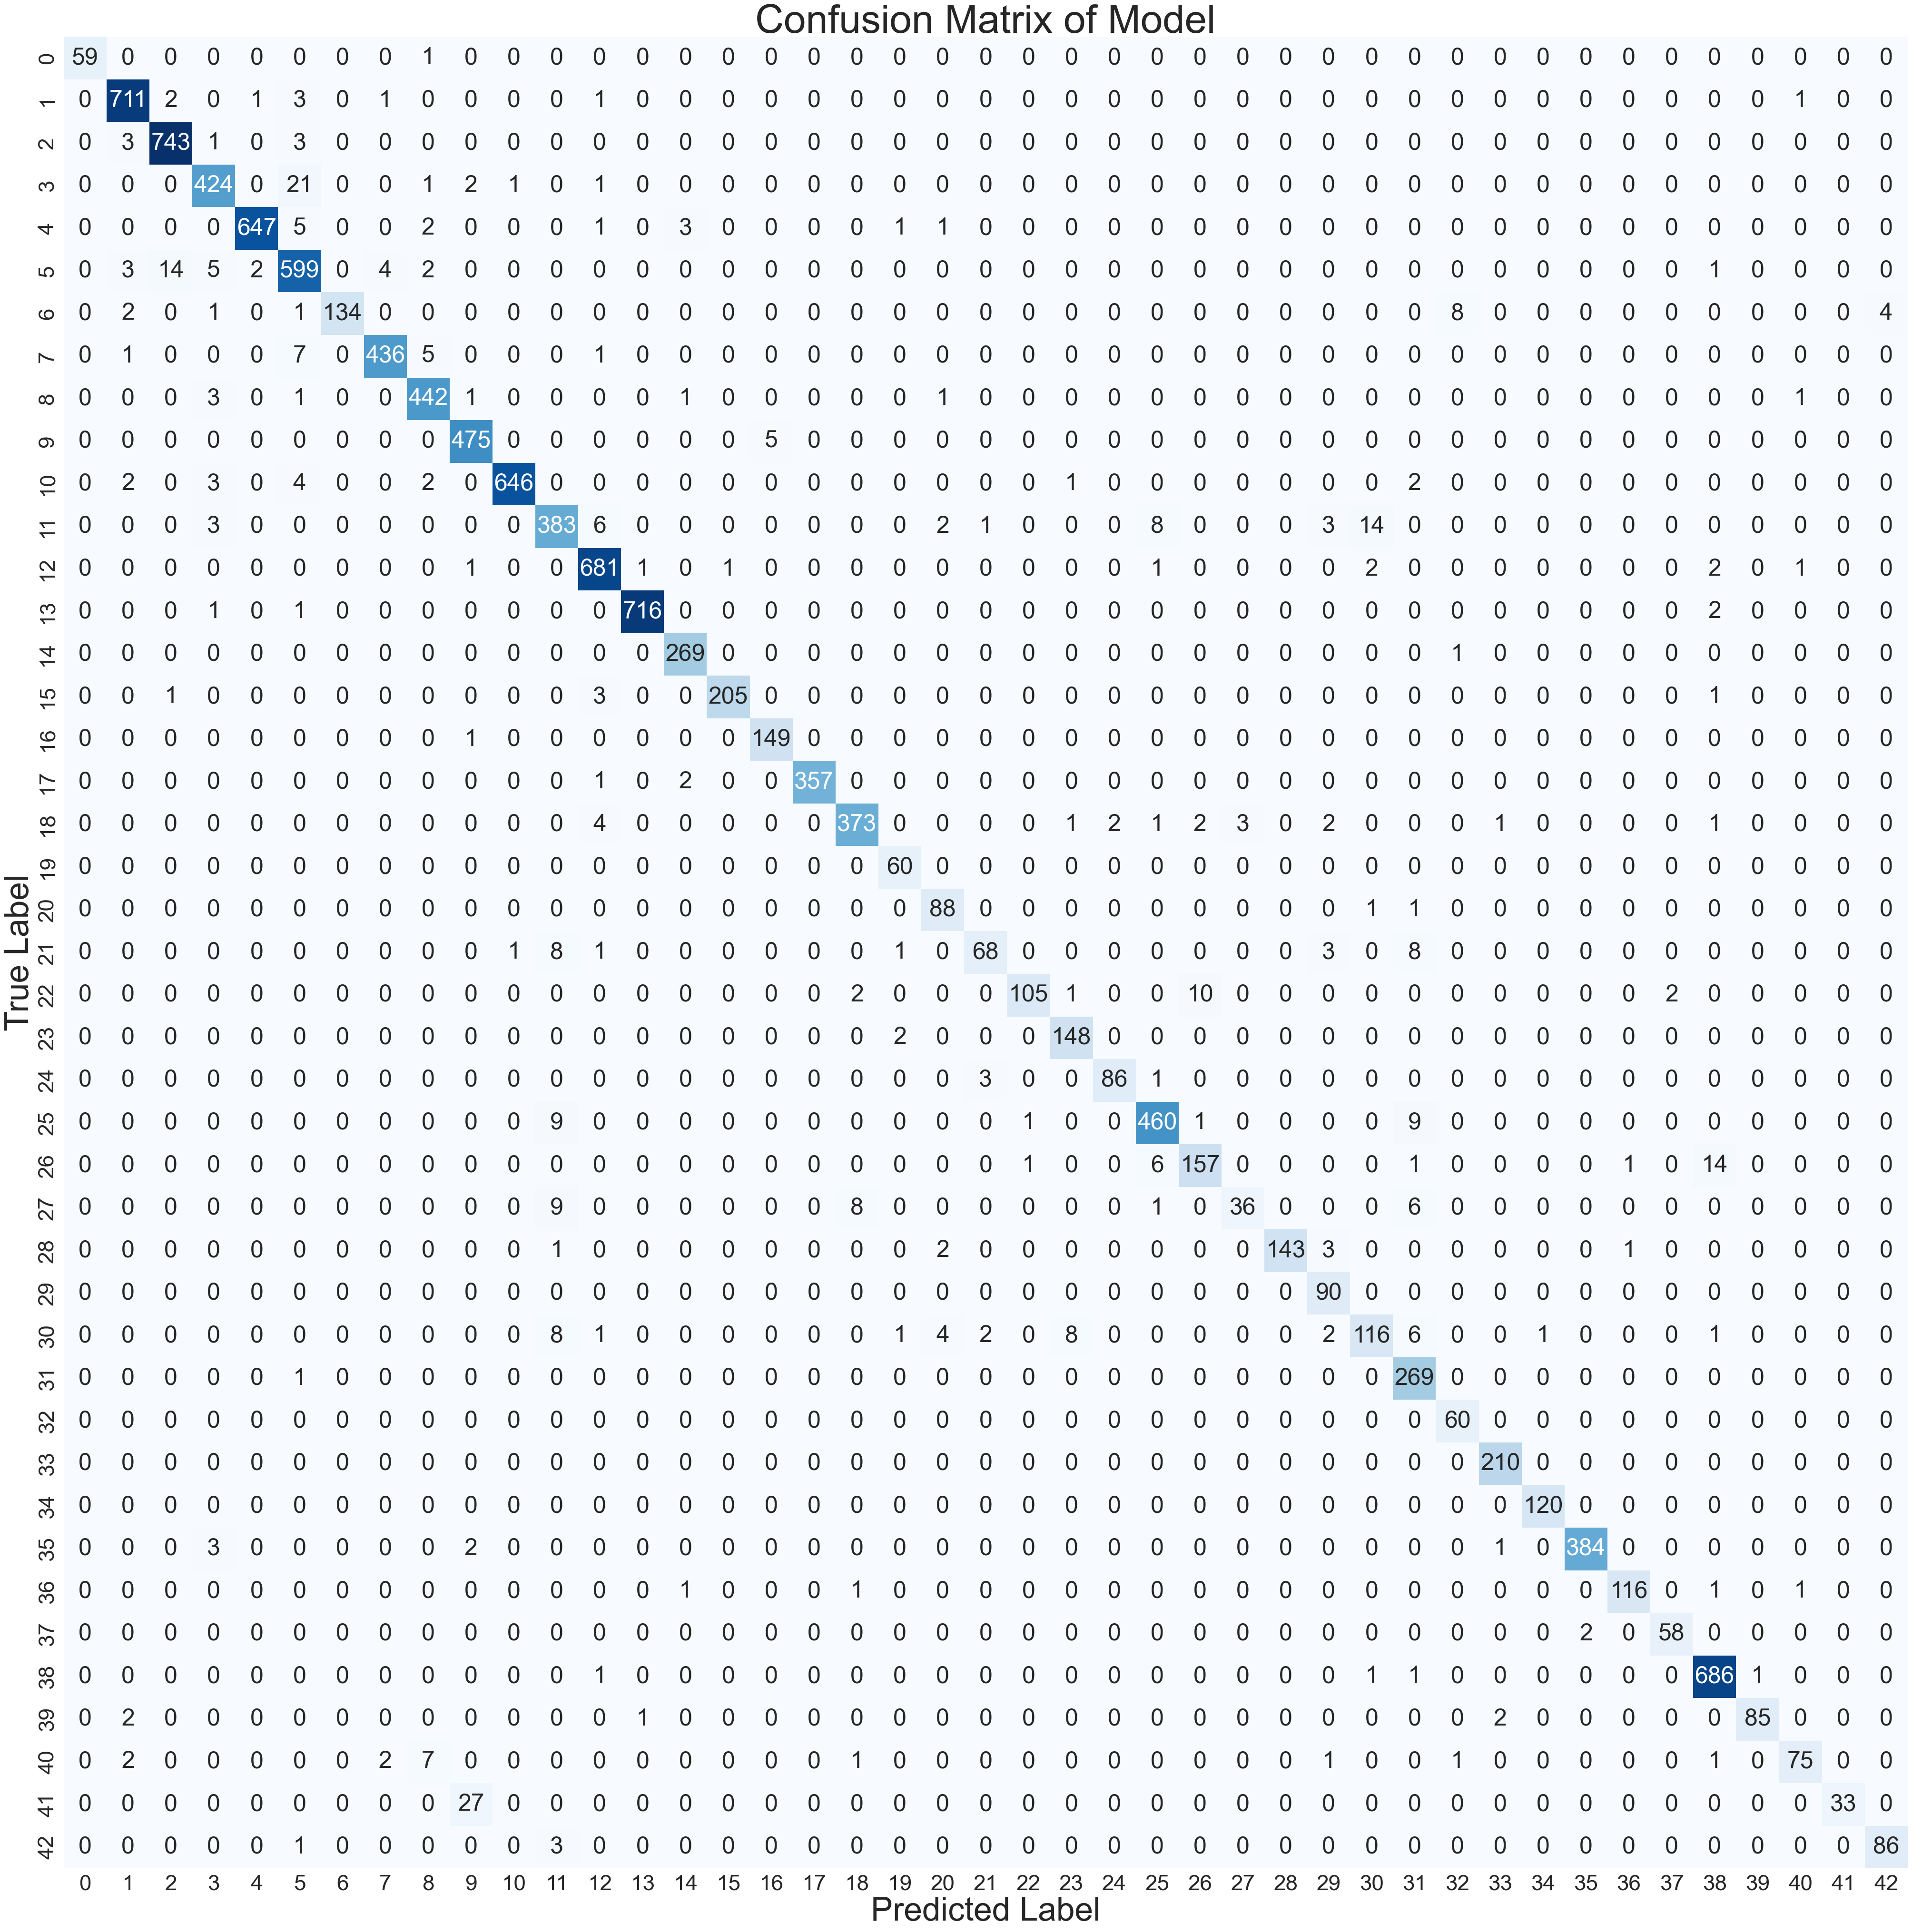

In [9]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(label, pred)
import seaborn as sns
plt.figure(figsize = (50,50))
sns.set(font_scale=3)
sns.heatmap(cf,annot=True,cmap='Blues',cbar=False,fmt='g')
plt.ylabel('True Label',fontsize=50)
plt.xlabel('Predicted Label',fontsize=50)
plt.title('Confusion Matrix of Model',fontsize=60)
plt.show()

## Saving the Model to make prediction at any time

In [10]:
model.save("Ws.h5")

## Loading the Model and apply prediction

In [2]:
import os
from keras.models import load_model
model = load_model('Ws.h5')

In [3]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

1/1 [==============================] - 0s 195ms/step
Predicted traffic sign is:  Speed limit (60km/h)


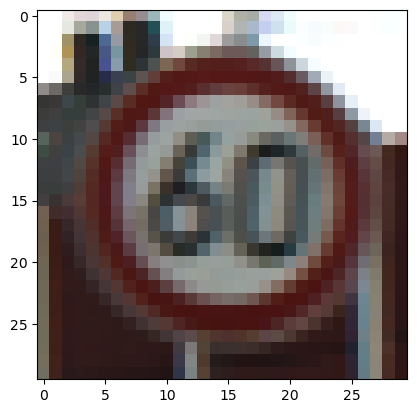

In [5]:
plot,prediction = test_on_img('Test/00115.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()